# Тема: АССОЦИАТИВНЫЕ ПРАВИЛА

## Импорты

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import plotly.express as px
import time

get_ipython().system('pip install apriori_python')
from apriori_python import apriori

get_ipython().system('pip install apyori')
from apyori import apriori as Yapi

!pip install efficient-apriori
import efficient_apriori as Efficient

!pip install fpgrowth_py
from fpgrowth_py import fpgrowth

print("Балакин Даниил ИНБО-02-21")

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=45bb435a0dec0739dd9da89a95c4da8fbd35cc8a8e9e8fff43b9dc2909a4578a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori
Балакин Даниил ИНБО-02-21


## Задание №1
Загрузить данные Market_Basket_Optimisation.csv

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTquamJFpXKZyI_repm57tgCeSfQaCKGOZPN0IFeJemOUgQsexDjw6q5ElJn_nrOolDhy353BvtiEqp/pub?output=csv'
df = pd.read_csv(url)
print("Балакин Даниил ИНБО-02-21")
df.keys()

Балакин Даниил ИНБО-02-21


Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

## Задание №2
Визуализировать данные (отразить на гистограммах относительную и
фактическую частоту встречаемости для 20 наиболее популярных
товаров)

Балакин Даниил ИНБО-02-21


<Axes: >

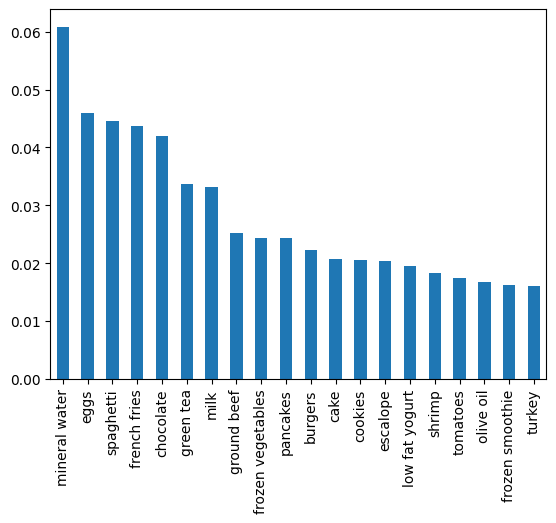

In [3]:
print("Балакин Даниил ИНБО-02-21")
df.stack().value_counts(normalize=True).head(20).plot(kind='bar') #Относительная частота

Балакин Даниил ИНБО-02-21


<Axes: >

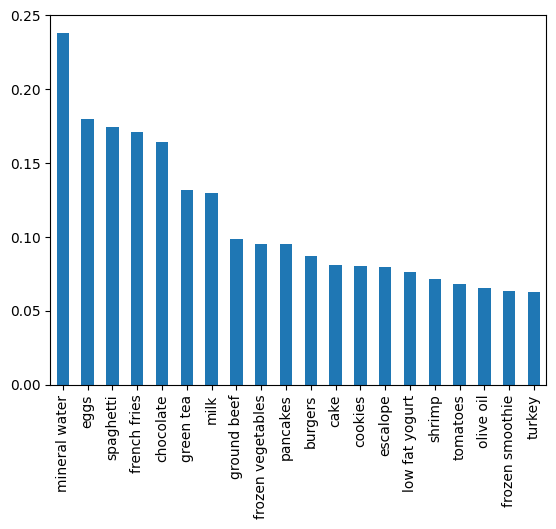

In [4]:
print("Балакин Даниил ИНБО-02-21")
df.stack().value_counts().head(20).apply(lambda item: item / df.shape[0]).plot(kind='bar') #Фактичесская частота

## Задание №3
Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для
алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [5]:
#apriori_python
print("Балакин Даниил ИНБО-02-21")
T = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    T.append(row)
T[0][0]

Балакин Даниил ИНБО-02-21


'burgers'

In [6]:
print("Балакин Даниил ИНБО-02-21")
T[0]

Балакин Даниил ИНБО-02-21


['burgers', 'meatballs', 'eggs']

In [7]:
print("Балакин Даниил ИНБО-02-21")
t = []
start = time.process_time()

t1, rules = apriori(T, minSup= 0.02, minConf= 0.05)
time1 = (time.process_time() - start)
t.append(time1)

Балакин Даниил ИНБО-02-21


In [8]:
print("Балакин Даниил ИНБО-02-21")
rules

Балакин Даниил ИНБО-02-21


[[{'mineral water'}, {'frozen smoothie'}, 0.08449916060436485],
 [{'mineral water'}, {'cooking oil'}, 0.08449916060436485],
 [{'mineral water'}, {'whole wheat rice'}, 0.08449916060436485],
 [{'mineral water'}, {'chicken'}, 0.09569110240626749],
 [{'mineral water'}, {'soup'}, 0.09681029658645775],
 [{'mineral water'}, {'shrimp'}, 0.09848908785674315],
 [{'mineral water'}, {'low fat yogurt'}, 0.10016787912702854],
 [{'mineral water'}, {'tomatoes'}, 0.10240626748740907],
 [{'mineral water'}, {'burgers'}, 0.10240626748740907],
 [{'eggs'}, {'ground beef'}, 0.11127596439169139],
 [{'mineral water'}, {'cake'}, 0.1152770005595971],
 [{'mineral water'}, {'olive oil'}, 0.1152770005595971],
 [{'french fries'}, {'pancakes'}, 0.11778471138845553],
 [{'spaghetti'}, {'tomatoes'}, 0.12021439509954059],
 [{'eggs'}, {'frozen vegetables'}, 0.12091988130563798],
 [{'eggs'}, {'pancakes'}, 0.12091988130563798],
 [{'spaghetti'}, {'shrimp'}, 0.1217457886676876],
 [{'spaghetti'}, {'burgers'}, 0.123277182235834

In [9]:
#apyori
print("Балакин Даниил ИНБО-02-21")
start = time.process_time()
rules = Yapi(T, min_support=0.02, min_confidence=0.05, min_lift=2, min_length=2)
results = list(rules)
time2 = (time.process_time() - start)
t.append(time2)

Балакин Даниил ИНБО-02-21


In [10]:
print("Балакин Даниил ИНБО-02-21")
results

Балакин Даниил ИНБО-02-21


[RelationRecord(items=frozenset({'ground beef', 'spaghetti'}), support=0.0392, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'spaghetti'}), confidence=0.39891451831750335, lift=2.2908567284695827), OrderedStatistic(items_base=frozenset({'spaghetti'}), items_add=frozenset({'ground beef'}), confidence=0.225114854517611, lift=2.2908567284695827)]),
 RelationRecord(items=frozenset({'spaghetti', 'olive oil'}), support=0.022933333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'spaghetti'}), confidence=0.3488843813387424, lift=2.0035473660341254), OrderedStatistic(items_base=frozenset({'spaghetti'}), items_add=frozenset({'olive oil'}), confidence=0.13169984686064318, lift=2.0035473660341254)])]

In [11]:
#efficient_apriori
print("Балакин Даниил ИНБО-02-21")
start = time.process_time()
itemsets, rules = Efficient.apriori(T, min_support=0.02, min_confidence=0.05)
time3 = (time.process_time() - start)
t.append(time3)
for i in range(len(rules)):
    print(rules[i])

Балакин Даниил ИНБО-02-21
{eggs} -> {burgers} (conf: 0.160, supp: 0.029, lift: 1.838, conv: 1.087)
{burgers} -> {eggs} (conf: 0.330, supp: 0.029, lift: 1.838, conv: 1.225)
{french fries} -> {burgers} (conf: 0.129, supp: 0.022, lift: 1.476, conv: 1.048)
{burgers} -> {french fries} (conf: 0.252, supp: 0.022, lift: 1.476, conv: 1.109)
{mineral water} -> {burgers} (conf: 0.102, supp: 0.024, lift: 1.174, conv: 1.017)
{burgers} -> {mineral water} (conf: 0.280, supp: 0.024, lift: 1.174, conv: 1.058)
{spaghetti} -> {burgers} (conf: 0.123, supp: 0.021, lift: 1.414, conv: 1.041)
{burgers} -> {spaghetti} (conf: 0.246, supp: 0.021, lift: 1.414, conv: 1.096)
{mineral water} -> {cake} (conf: 0.115, supp: 0.027, lift: 1.422, conv: 1.039)
{cake} -> {mineral water} (conf: 0.339, supp: 0.027, lift: 1.422, conv: 1.152)
{mineral water} -> {chicken} (conf: 0.096, supp: 0.023, lift: 1.595, conv: 1.039)
{chicken} -> {mineral water} (conf: 0.380, supp: 0.023, lift: 1.595, conv: 1.229)
{eggs} -> {chocolate} (c

## Задание  №4
Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать
гиперпараметры для алгоритма так, чтобы выводилось порядка 10
наилучших правил.

In [12]:
print("Балакин Даниил ИНБО-02-21")
start = time.process_time()
rules = fpgrowth(T, minSupRatio=0.02, minConf=0.05)
time4 = (time.process_time() - start)
t.append(time4)

Балакин Даниил ИНБО-02-21


In [13]:
print("Балакин Даниил ИНБО-02-21")
for i in range(len(rules)):
    print(rules[i])

Балакин Даниил ИНБО-02-21
[{'almonds'}, {'meatballs'}, {'strawberries'}, {'fresh tuna'}, {'french wine'}, {'oil'}, {'muffins'}, {'vegetables mix'}, {'cereals'}, {'pepper'}, {'energy drink'}, {'energy bar'}, {'ham'}, {'light mayo'}, {'yogurt cake'}, {'red wine'}, {'whole wheat pasta'}, {'butter'}, {'tomato juice'}, {'cottage cheese'}, {'hot dogs'}, {'avocado'}, {'brownies'}, {'salmon'}, {'fresh bread'}, {'champagne'}, {'honey'}, {'herb & pepper'}, {'soup'}, {'soup', 'mineral water'}, {'cooking oil'}, {'cooking oil', 'mineral water'}, {'grated cheese'}, {'whole wheat rice'}, {'whole wheat rice', 'mineral water'}, {'chicken'}, {'chicken', 'mineral water'}, {'turkey'}, {'frozen smoothie'}, {'frozen smoothie', 'mineral water'}, {'olive oil'}, {'spaghetti', 'olive oil'}, {'olive oil', 'mineral water'}, {'tomatoes'}, {'spaghetti', 'tomatoes'}, {'tomatoes', 'mineral water'}, {'shrimp'}, {'spaghetti', 'shrimp'}, {'mineral water', 'shrimp'}, {'low fat yogurt'}, {'low fat yogurt', 'mineral water'

## Задание  №5
Сравнить время выполнения всех алгоритмов и построить гистограмму

Балакин Даниил ИНБО-02-21
Время выполнения алгоритмов:
apriori_python:  6.2046397110000004
apyori:  0.03835870099999994
efficient_apriori:  0.03571041800000074
fpgrowth_py:  1.0511375829999992


<BarContainer object of 4 artists>

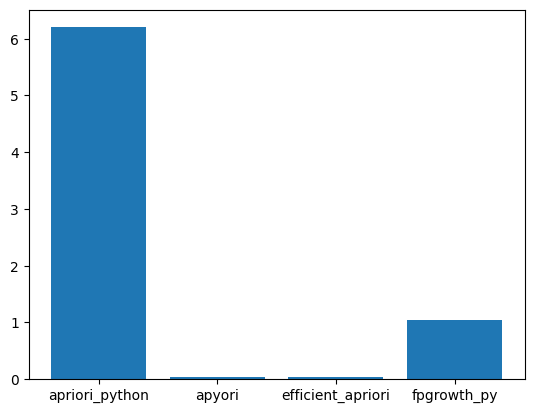

In [14]:
print("Балакин Даниил ИНБО-02-21")
print("Время выполнения алгоритмов:")
print("apriori_python: ", time1)
print("apyori: ", time2)
print("efficient_apriori: ", time3)
print("fpgrowth_py: ", time4)
plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth_py'], t)

## Задание  №6
Загрузить данные data.csv

In [15]:
print("Балакин Даниил ИНБО-02-21")
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTquamJFpXKZyI_repm57tgCeSfQaCKGOZPN0IFeJemOUgQsexDjw6q5ElJn_nrOolDhy353BvtiEqp/pub?output=csv'
df = pd.read_csv(url)
print("Балакин Даниил ИНБО-02-21")
df.keys()

Балакин Даниил ИНБО-02-21
Балакин Даниил ИНБО-02-21


Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

## Задание  №7
Визуализировать данные (отразить на гистограммах относительную и
фактическую частоту встречаемости для 20 наиболее популярных
товаров)

Балакин Даниил ИНБО-02-21


<Axes: >

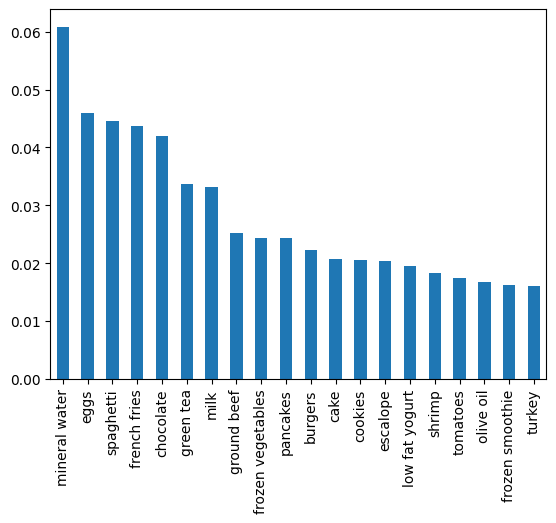

In [16]:
print("Балакин Даниил ИНБО-02-21")
df.stack().value_counts(normalize=True).head(20).plot(kind='bar') #Относительная частота

Балакин Даниил ИНБО-02-21


<Axes: >

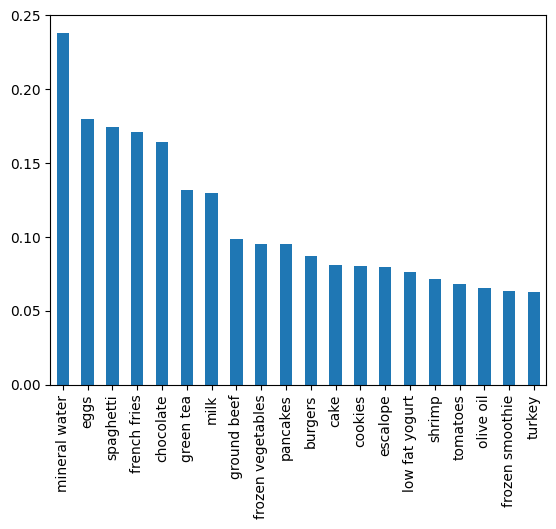

In [17]:
print("Балакин Даниил ИНБО-02-21")
df.stack().value_counts().head(20).apply(lambda item: item / df.shape[0]).plot(kind='bar') #Фактичесская частота

## Задание  №8
Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для
алгоритмов так, чтобы выводилось порядка 10 наилучших правил

In [18]:
#apriori_python
print("Балакин Даниил ИНБО-02-21")
T = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    T.append(row)
T[0][0]

Балакин Даниил ИНБО-02-21


'burgers'

In [19]:
print("Балакин Даниил ИНБО-02-21")
t = []
start = time.process_time()

t1, rules = apriori(T, minSup= 0.002, minConf= 0.005)
time1 = (time.process_time() - start)
t.append(time1)

Балакин Даниил ИНБО-02-21


In [20]:
print("Балакин Даниил ИНБО-02-21")
rules

Балакин Даниил ИНБО-02-21


[[{'mineral water'}, {'pet food'}, 0.008393956351426972],
 [{'mineral water'}, {'hand protein bar'}, 0.008393956351426972],
 [{'mineral water'}, {'avocado', 'burgers'}, 0.008393956351426972],
 [{'mineral water'}, {'cooking oil', 'honey'}, 0.008393956351426972],
 [{'mineral water'}, {'almonds', 'green tea'}, 0.008393956351426972],
 [{'mineral water'}, {'cereals', 'green tea'}, 0.008393956351426972],
 [{'mineral water'}, {'honey', 'tomatoes'}, 0.008393956351426972],
 [{'mineral water'}, {'chocolate', 'tomato sauce'}, 0.008393956351426972],
 [{'mineral water'}, {'ham', 'olive oil'}, 0.008393956351426972],
 [{'mineral water'}, {'champagne', 'pancakes'}, 0.008393956351426972],
 [{'mineral water'}, {'salmon', 'soup'}, 0.008393956351426972],
 [{'mineral water'},
  {'grated cheese', 'whole wheat rice'},
  0.008393956351426972],
 [{'mineral water'}, {'hot dogs', 'olive oil'}, 0.008393956351426972],
 [{'mineral water'}, {'champagne', 'milk'}, 0.008393956351426972],
 [{'mineral water'}, {'frozen 

In [21]:
#apyori
print("Балакин Даниил ИНБО-02-21")
start = time.process_time()
rules = Yapi(T, min_support=0.002, min_confidence=0.005, min_lift=2, min_length=2)
results = list(rules)
time2 = (time.process_time() - start)
t.append(time2)

Балакин Даниил ИНБО-02-21


In [22]:
print("Балакин Даниил ИНБО-02-21")
results

Балакин Даниил ИНБО-02-21


[RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.0052, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.2565789473684211, lift=2.9424191211974895), OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'almonds'}), confidence=0.059633027522935776, lift=2.942419121197489)]),
 RelationRecord(items=frozenset({'frozen smoothie', 'almonds'}), support=0.0026666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'frozen smoothie'}), confidence=0.13157894736842105, lift=2.0819453697534973), OrderedStatistic(items_base=frozenset({'frozen smoothie'}), items_add=frozenset({'almonds'}), confidence=0.04219409282700421, lift=2.0819453697534973)]),
 RelationRecord(items=frozenset({'olive oil', 'almonds'}), support=0.0028, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'olive oil'}), confidence=0.

In [23]:
#efficient_apriori
print("Балакин Даниил ИНБО-02-21")
start = time.process_time()
itemsets, rules = Efficient.apriori(T, min_support=0.002, min_confidence=0.005)
time3 = (time.process_time() - start)
t.append(time3)
for i in range(len(rules)):
    print(rules[i])

Выходные данные были обрезаны до нескольких последних строк (5000).
{french fries, milk} -> {olive oil} (conf: 0.135, supp: 0.003, lift: 2.051, conv: 1.080)
{olive oil} -> {french fries, milk} (conf: 0.049, supp: 0.003, lift: 2.051, conv: 1.026)
{milk} -> {french fries, olive oil} (conf: 0.025, supp: 0.003, lift: 2.684, conv: 1.016)
{french fries} -> {milk, olive oil} (conf: 0.019, supp: 0.003, lift: 1.097, conv: 1.002)
{milk, pancakes} -> {french fries} (conf: 0.210, supp: 0.003, lift: 1.227, conv: 1.049)
{french fries, pancakes} -> {milk} (conf: 0.172, supp: 0.003, lift: 1.329, conv: 1.051)
{french fries, milk} -> {pancakes} (conf: 0.146, supp: 0.003, lift: 1.536, conv: 1.060)
{pancakes} -> {french fries, milk} (conf: 0.036, supp: 0.003, lift: 1.536, conv: 1.013)
{milk} -> {french fries, pancakes} (conf: 0.027, supp: 0.003, lift: 1.329, conv: 1.007)
{french fries} -> {milk, pancakes} (conf: 0.020, supp: 0.003, lift: 1.227, conv: 1.004)
{milk, shrimp} -> {french fries} (conf: 0.220, s

## Задание  №9
Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать
гиперпараметры для алгоритма так, чтобы выводилось порядка 10
наилучших правил

In [24]:
print("Балакин Даниил ИНБО-02-21")
start = time.process_time()
rules = fpgrowth(T, minSupRatio=0.002, minConf=0.005)
time4 = (time.process_time() - start)
t.append(time4)

Балакин Даниил ИНБО-02-21


In [25]:
print("Балакин Даниил ИНБО-02-21")
for i in range(len(rules)):
    print(rules[i])

Балакин Даниил ИНБО-02-21
[{'tea'}, {'chutney'}, {'mashed potato'}, {'chocolate bread'}, {'dessert wine'}, {'ketchup'}, {'oatmeal'}, {'sandwich'}, {'babies food'}, {'corn'}, {'asparagus'}, {'asparagus', 'mineral water'}, {'salad'}, {'cauliflower'}, {'shampoo'}, {'hand protein bar'}, {'hand protein bar', 'mineral water'}, {'mint green tea'}, {'burger sauce'}, {'burger sauce', 'mineral water'}, {'burger sauce', 'spaghetti'}, {'pickles'}, {'mayonnaise'}, {'mineral water', 'mayonnaise'}, {'chili'}, {'chili', 'mineral water'}, {'chili', 'spaghetti'}, {'sparkling water'}, {'soda'}, {'pet food'}, {'pet food', 'mineral water'}, {'spinach'}, {'spinach', 'french fries'}, {'spinach', 'mineral water'}, {'gluten free bar'}, {'gluten free bar', 'pancakes'}, {'gluten free bar', 'mineral water'}, {'shallot'}, {'cookies', 'shallot'}, {'green tea', 'shallot'}, {'shallot', 'french fries'}, {'strong cheese'}, {'milk', 'strong cheese'}, {'mineral water', 'strong cheese'}, {'spaghetti', 'strong cheese'}, {'

## Задание №10
Сравнить время выполнения всех алгоритмов и построить гистограмму


Балакин Даниил ИНБО-02-21
Время выполнения алгоритмов:
apriori_python:  52.179969295999996
apyori:  1.6555399049999977
efficient_apriori:  0.4425541490000029
fpgrowth_py:  55.832612776999994


<BarContainer object of 4 artists>

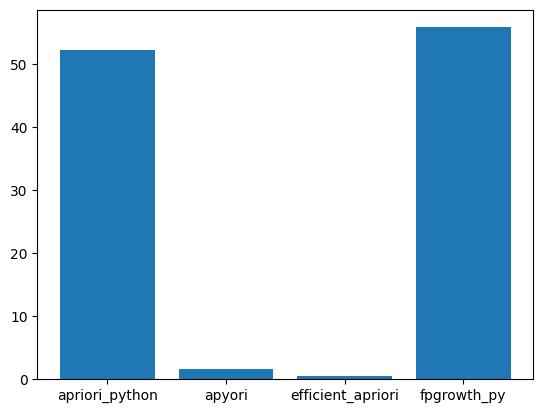

In [26]:
print("Балакин Даниил ИНБО-02-21")
print("Время выполнения алгоритмов:")
print("apriori_python: ", time1)
print("apyori: ", time2)
print("efficient_apriori: ", time3)
print("fpgrowth_py: ", time4)
plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth_py'], t)